In [1]:
try:
    import distrax
except ModuleNotFoundError:
    %pip install -qq distrax
    import distrax
    
try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    %pip install -qq matplotlib
    import matplotlib.pyplot as plt

try:
    import pandas as pd
except ModuleNotFoundError:
    %pip install -qq pandas
    import pandas as pd

try:
    import seaborn as sns
except ModuleNotFoundError:
    %pip install -qq seaborn
    import seaborn as sns
    
try:
    import jax
except ModuleNotFoundError:
    %pip install -qq jax
    import jax

import jax.numpy as jnp

    
%matplotlib inline

/Users/nipun/miniconda3/lib/python3.8/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
p_h = 0.7
bern = distrax.Bernoulli(probs=p_h)

In [3]:
p_t = 1 - p_h 
p_t

0.30000000000000004

In [4]:
ser = pd.Series({"Tails (0)":p_t, "Heads (1)": p_h})
ser

Tails (0)    0.3
Heads (1)    0.7
dtype: float64

Text(0, 0.5, 'PDF (P(X))')

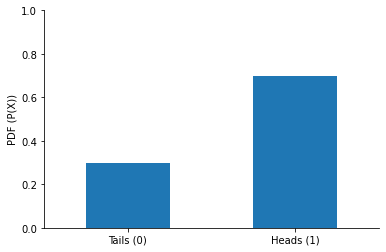

In [5]:
ser.plot(kind='bar', rot = 0)
sns.despine()
plt.ylim((0, 1))
plt.ylabel("PDF (P(X))")

In [6]:
probabilities = jnp.array([p_t, p_h])
probabilities

DeviceArray([0.3, 0.7], dtype=float32)

In [7]:
cdf_vals = probabilities.cumsum()

In [8]:
cdf_series = pd.Series(data=cdf_vals, index=["Tails (0)", "Heads (1)"])

In [9]:
cdf_series

Tails (0)    0.3
Heads (1)    1.0
dtype: float32

Text(0, 0.5, 'CDF ($F_X(x))$')

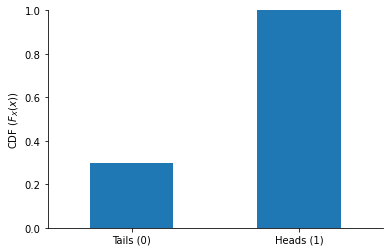

In [10]:
cdf_series.plot(kind='bar', rot = 0)
sns.despine()
plt.ylim((0, 1))
plt.ylabel(r"CDF ($F_X(x))$")

In [11]:
bern_samples = bern.sample(seed = jax.random.PRNGKey(2), sample_shape=1000)
bern_samples.sum()

DeviceArray(716, dtype=int32)

In [12]:
categorical_dist = distrax.Categorical(probs = [p_t, p_h])

In [13]:
categorical_samples = categorical_dist.sample(
    seed=jax.random.PRNGKey(2), sample_shape=1000
)
categorical_samples.sum()

DeviceArray(696, dtype=int32)

In [14]:
categorical_dist.probs

DeviceArray([0.3, 0.7], dtype=float32)

<AxesSubplot:>

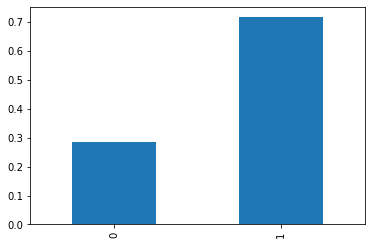

In [15]:
(pd.Series(bern_samples).value_counts().sort_index()/len(bern_samples)).plot(kind='bar')

<AxesSubplot:>

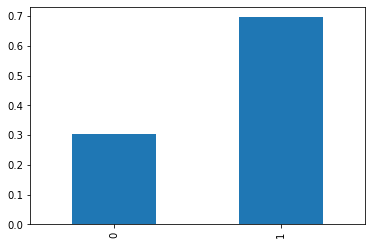

In [16]:
(pd.Series(categorical_samples).value_counts().sort_index()/len(bern_samples)).plot(kind='bar')

In [17]:
U = distrax.Uniform()


In [18]:
u = U.sample(seed = jax.random.PRNGKey(2), sample_shape = 1000)

<AxesSubplot:ylabel='Density'>

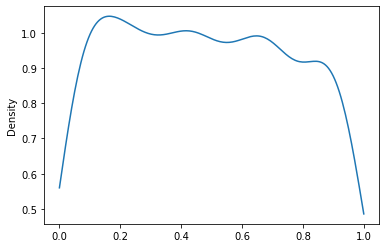

In [19]:
sns.kdeplot(u, clip = [0, 1])

In [20]:
p_t, p_h

(0.30000000000000004, 0.7)

In [21]:
(u > p_t).astype('int').sum()

/Users/nipun/miniconda3/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:5154: UserWarning: Explicitly requested dtype int requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax_internal._check_user_dtype_supported(dtype, "astype")


DeviceArray(682, dtype=int32)

<AxesSubplot:title={'center':'PDF'}>

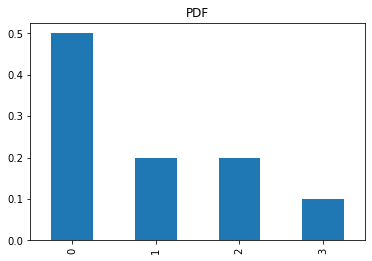

In [22]:
probs = jnp.array([0.5, 0.2, 0.2, 0.1])
pd.Series(probs, index = [0, 1, 2, 3]).plot(kind='bar', title='PDF')

<AxesSubplot:title={'center':'CDF'}>

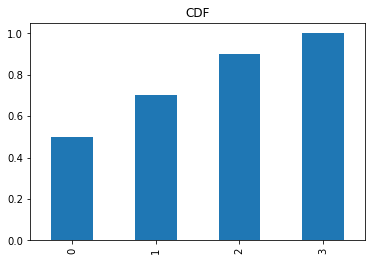

In [23]:
pd.Series(probs, index = [0, 1, 2, 3]).cumsum().plot(kind='bar', title='CDF')

In [24]:
import tensorflow_probability.substrates.jax as tfp

exp_d = tfp.distributions.Exponential(rate = 1)

In [26]:
its_samples = -jnp.log(1-u)

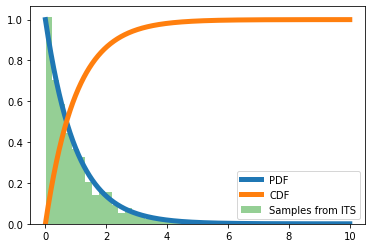

In [27]:
xs = jnp.linspace(0, 10, 1000)
plt.plot(xs, exp_d.prob(xs), label = 'PDF', lw=5)
plt.plot(xs, 1 - exp_d.prob(xs), label = 'CDF', lw=5)
plt.hist(its_samples, density=True, label='Samples from ITS', alpha=0.5, bins=30)
plt.legend()

(array([0.76788232, 0.37935222, 0.16979068, 0.10095664, 0.05659689,
        0.02294469, 0.00917787, 0.00917788, 0.00917787, 0.00458894]),
 array([3.5508659e-03, 6.5729690e-01, 1.3110429e+00, 1.9647890e+00,
        2.6185350e+00, 3.2722812e+00, 3.9260271e+00, 4.5797734e+00,
        5.2335191e+00, 5.8872652e+00, 6.5410113e+00], dtype=float32),
 <BarContainer object of 10 artists>)

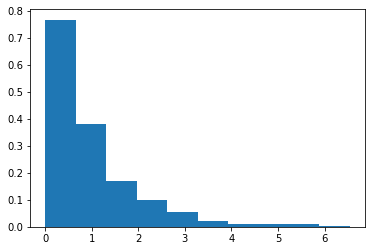

In [28]:
plt.hist(its_samples, density=True)

In [29]:
from typing import Generator

def lcg(modulus: int, a: int, c: int, seed: int) -> Generator[int, None, None]:
    """Linear congruential generator."""
    while True:
        seed = (a * seed + c) % modulus
        yield seed

In [30]:
m = 2**31 - 1
a = 313
c = 529
seed = 7

In [31]:
random_var = lcg(m, a, c, seed)

In [32]:
random_uniform_samples = jnp.array([next(random_var)/m for _ in range(1000)])

(array([ 88.,  86.,  91., 102., 115.,  99., 101., 100., 102., 116.]),
 array([1.2665987e-06, 9.9867292e-02, 1.9973332e-01, 2.9959935e-01,
        3.9946538e-01, 4.9933138e-01, 5.9919739e-01, 6.9906342e-01,
        7.9892945e-01, 8.9879549e-01, 9.9866152e-01], dtype=float32),
 <BarContainer object of 10 artists>)

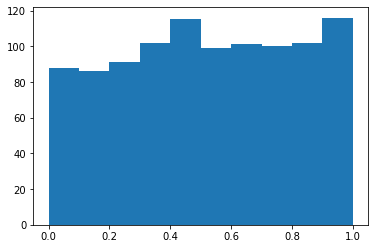

In [33]:
plt.hist(random_uniform_samples)